# Lab 6: Clustering


## Preprocess Data: check for missing values

In [48]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.cluster import normalized_mutual_info_score

heartData = pd.read_csv("D:\Programming\Python_code\PrinciplesOfDS_Course\Labs\Data\heart.csv")
print(heartData.info()) # all data types int or float, no non-numeric features. No categorical features to convert 

# Check for missing values 
heartData.isna().sum()/heartData.shape[0] # all values 0. No missing values. 

# split data into training and testing partitions

X, y = heartData.drop(columns='target'), heartData.target

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size= 0.14, random_state=2)

print("view shapes:", X_train_val.shape, X_test.shape)
print(X_train_val.shape) # correct split value achieved 
print(y_train_val.shape)

normalizer = StandardScaler()
X_train_val = normalizer.fit_transform(X_train_val)
X_test = normalizer.transform(X_test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None
view shapes: (260, 13) (43, 13)
(260, 13)
(260,)


In [51]:
# no point in doing more than 2 clusters as we know there are only 2 possible categories already
cluster = KMeans(n_clusters=2, random_state=1).fit(X_train_val) 

nmi = normalized_mutual_info_score(cluster.labels_, y_train_val, average_method='arithmetic')
print('The normalized mutual information score of the K-means method is {:.4f}'.format(nmi))

The normalized mutual information score of the K-means method is 0.2966


c:\Users\Tanner_N\AppData\Local\Python\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## Try different hyper-parameters


In [53]:
test_k = [2,3,4,5]
test_n_init = [10, 20, 30, 50]
test_init = ['k-means++', 'random']

best_nmi = 0
best_k = None
best_n_init = None
best_init = None

for k in test_k:
    for n in test_n_init:
        for init in test_init:
            temp_cluster = KMeans(n_clusters=k, init=init, n_init=n).fit(X_train_val)
            temp_nmi = normalized_mutual_info_score(temp_cluster.labels_, y_train_val, average_method='arithmetic')
            print(temp_nmi)
            if(temp_nmi > best_nmi):
                best_nmi = temp_nmi
                best_k = k
                best_n_init = n
                best_init = init

print("Best of each category:\nBest nmi {}\nBest k cluster {}\nBest n_init {}\nBest init {}".format(best_nmi, best_k, best_n_init, best_init))

0.2966004772043562
0.2966004772043562
0.2966004772043562
0.2966004772043562
0.2966004772043562
0.2966004772043562
0.2966004772043562
0.2966004772043562
0.1902923670597497
0.1902923670597497
0.19776335297937586
0.1902923670597497
0.1902923670597497
0.1902923670597497
0.18722152772967374
0.1902923670597497
0.2121740049063765
0.2306911385965754
0.19279011650983055
0.2356915231808835
0.2121740049063765
0.20378973757865157
0.2121740049063765
0.22262837796469595
0.17451752880479784
0.21280313431045944
0.21316705947603348
0.18240520957072862
0.18653257120522532
0.19894032070102471
0.17940761279463852
0.2002889132970947
Best of each category:
Best nmi 0.2966004772043562
Best k cluster 2
Best n_init 10
Best init k-means++


### Thoughts on different parameters: 
As stated above, there really isnt a point in trying to use more than 2 clusters, as we only have 2 possible categories of data. We know this going in, so we know the optimal cluster amount going in. Results substantially change for the worse with greater cluster amounts, further, there is no real imrovement on the nmi score in testing other hyperparameters. 

In [ ]:
# Predicting

### Dimensionality reduction for clear visualization of data


In [ ]:
from sklearn.decomposition import PCA

print(X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# print(X_scaled) # normalized 

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print("PCA values:\n", X_pca[0:9,:])

explained_variance_ratios = pca.explained_variance_ratio_
print("Explained variance ratios:", explained_variance_ratios) 
# [0.21254053 0.11820708], this is not a large amount of the variance which makes me think that PCA may not be very appropriate for this task. 

c:\Users\Tanner_N\AppData\Local\Python\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<class 'sklearn.cluster._kmeans.KMeans'>
260
<class 'pandas.core.frame.DataFrame'>


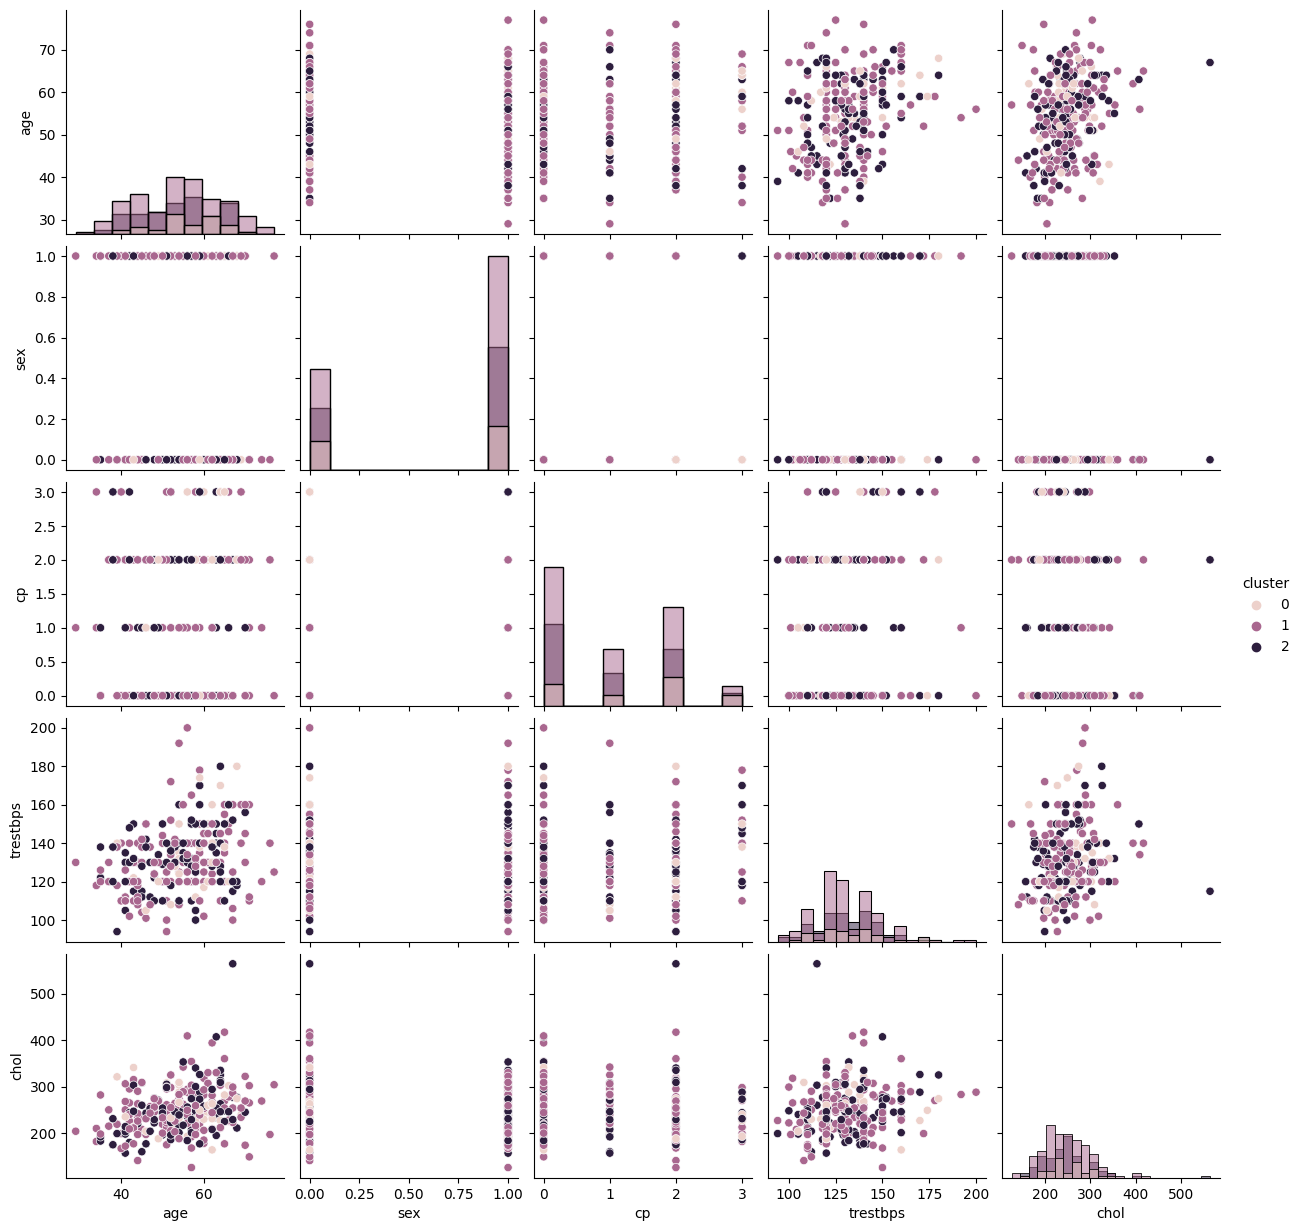

In [44]:
import seaborn as sns

# visualizing feature pairs in order to understand potential visualizations which may be valid 

cluster = KMeans(n_clusters=3, random_state=1).fit(X_train_val)

print(type(cluster))
print(len(cluster.labels_))
# Add cluster labels to the original dataset
print(type(heartData))
heartDataVis = heartData.iloc[:260,:5]
heartDataVis['cluster'] = cluster.labels_


# Create a pair plot of the clustering results
sns.pairplot(heartDataVis, hue='cluster', diag_kind='hist')
plt.show()